In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import PIL
print('Pillow Version:', PIL.__version__)
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


Pillow Version: 7.1.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
Data = []
name=[]
nameupd=[]
imgName= []
pth = '/content/drive/MyDrive/test'
for j in os.listdir(pth):
  imgName.append(j)
  name.append(pth+'/'+ j)
  nameupd.append('/content/drive/MyDrive/Updated2/'+ j)
  img = cv2.imread(pth+'/'+ j)
  Data.append(img)

In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.2)
k = 3

In [ ]:
for i,image_name in enumerate(name[:]):

    # print(nameupd[i])
    image = cv2.imread(image_name)
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pixel_values = image.reshape((-1, 3))
    # convert to float
    pixel_values = np.float32(pixel_values)
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_PP_CENTERS)
    # convert back to 8 bit values
    centers = np.uint8(centers)
    # flatten the labels array
    labels = labels.flatten()
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)


    masked_image = np.copy(image)
    # convert to the shape of a vector of pixel values
    masked_image = masked_image.reshape((-1, 3))
    # color (i.e cluster) to disable
    cluster1 = 0
    masked_image[labels == cluster1] = [0, 0, 0]
    cluster2 = 2
    masked_image[labels == cluster2] = [0, 0, 0]
    # convert back to original shape
    masked_image = masked_image.reshape(image.shape)

    result=cv2.imwrite(nameupd[i],masked_image)

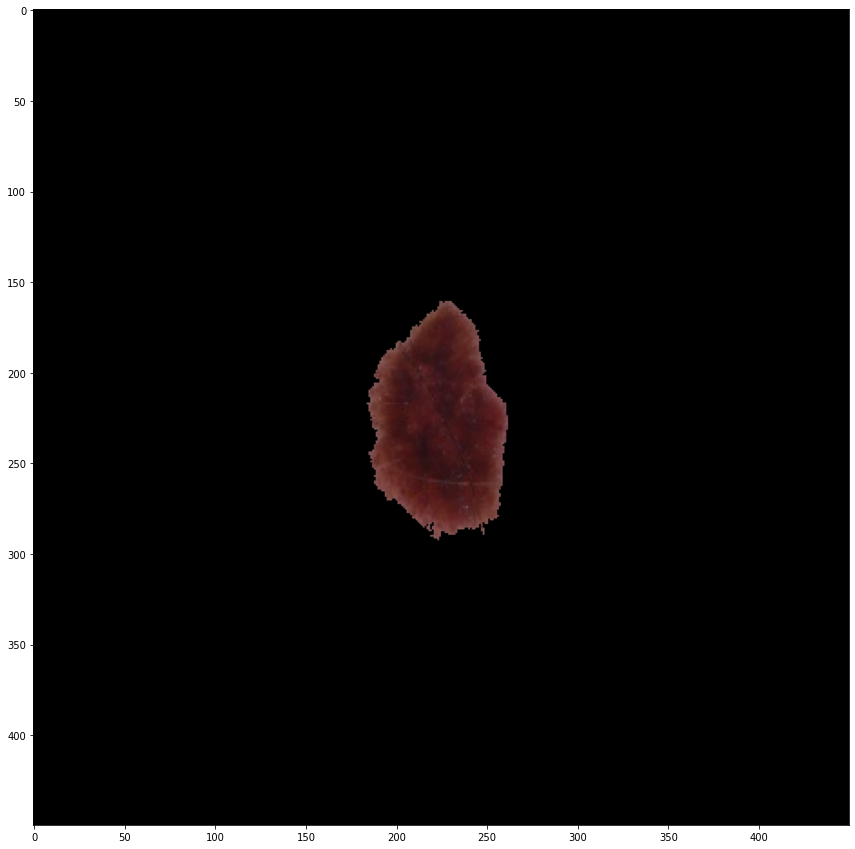

In [ ]:
masked_image = np.copy(image)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
cluster1 = 0
masked_image[labels == cluster1] = [0, 0, 0]
cluster2 = 2
masked_image[labels == cluster2] = [0, 0, 0]
# convert back to original shape
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
masked_image = masked_image.reshape(image.shape)
# show the image
plt.imshow(masked_image)
plt.show()